In [ ]:
!nvidia-smi

Mon Mar 18 04:58:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
### 1. Mount Google Drive ###

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
### 2. Prepare data ###

!scp '/content/gdrive/My Drive/MLProject/data.zip' '/content/data.zip'

!unzip '/content/data.zip' -d '/content/'

Archive:  /content/data.zip
   creating: /content/test/NoROP/
  inflating: /content/test/NoROP/NoROP_Patient1_equalized.jpg  
  inflating: /content/test/NoROP/NoROP_Patient10_2_equalized.jpg  
  inflating: /content/test/NoROP/NoROP_Patient10_2_eye2_equalized.jpg  
  inflating: /content/test/NoROP/NoROP_Patient10_equalized.jpg  
  inflating: /content/test/NoROP/NoROP_Patient11_equalized.jpg  
  inflating: /content/test/NoROP/NoROP_Patient12_equalized.jpg  
  inflating: /content/test/NoROP/NoROP_Patient13_equalized.jpg  
  inflating: /content/test/NoROP/NoROP_Patient14_equalized.jpg  
  inflating: /content/test/NoROP/NoROP_Patient15_equalized.jpg  
  inflating: /content/test/NoROP/NoROP_Patient16_equalized.jpg  
  inflating: /content/test/NoROP/NoROP_Patient17_2_equalized.jpg  
  inflating: /content/test/NoROP/NoROP_Patient17_equalized.jpg  
  inflating: /content/test/NoROP/NoROP_Patient18_2_equalized.jpg  
  inflating: /content/test/NoROP/NoROP_Patient18_equalized.jpg  
  inflating: /co

In [8]:
### 3. Install Ultralytics ###

!pip install ultralytics

In [9]:

### 4. Train model ###

import os

from ultralytics import YOLO


# Load a model
model = YOLO("yolov8n-cls.pt")  # load a pretained model

# Use the model
results = model.train(data='/content/data/', epochs=5)  # train the model

Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/data/, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

Unzipping /content/data.zip to /content/data...: 100%|██████████| 190/190 [00:00<00:00, 427.56file/s]

Dataset download success ✅ (0.5s), saved to /content/data

train: /content/data/train... found 91 images in 4 classes ✅ 
val: None...
test: /content/data/test... found 91 images in 4 classes ✅ 


Overriding model.yaml nc=1000 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralyti

100%|██████████| 6.23M/6.23M [00:00<00:00, 109MB/s]


AMP: checks passed ✅


train: Scanning /content/data/train... 91 images, 0 corrupt: 100%|██████████| 91/91 [00:00<00:00, 2975.63it/s]

train: New cache created: /content/data/train.cache



val: Scanning /content/data/test... 91 images, 0 corrupt: 100%|██████████| 91/91 [00:00<00:00, 3158.75it/s]

val: New cache created: /content/data/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train2
Starting training for 5 epochs...

      Epoch    GPU_mem       loss  Instances       Size


        1/5     0.403G      1.336         16        224:  67%|██████▋   | 4/6 [00:02<00:00,  2.01it/s]


100%|██████████| 755k/755k [00:00<00:00, 21.4MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all      0.341          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 34.07it/s]

                   all      0.429          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 45.92it/s]

                   all      0.429          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 32.66it/s]

                   all      0.407          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 28.52it/s]

                   all      0.407          1



5 epochs completed in 0.011 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 3.0MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1440004 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/data/train... found 91 images in 4 classes ✅ 
val: None...
test: /content/data/test... found 91 images in 4 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]


                   all      0.429          1
Speed: 0.1ms preprocess, 0.5ms inference, 0.2ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2
Results saved to runs/classify/train2


In [12]:
# Access classification metrics
top1_accuracy = results.top1
top5_accuracy = results.top5

print("Top-1 Accuracy:", top1_accuracy)
print("Top-5 Accuracy:", top5_accuracy)

Top-1 Accuracy: 0.4285714328289032
Top-5 Accuracy: 1.0


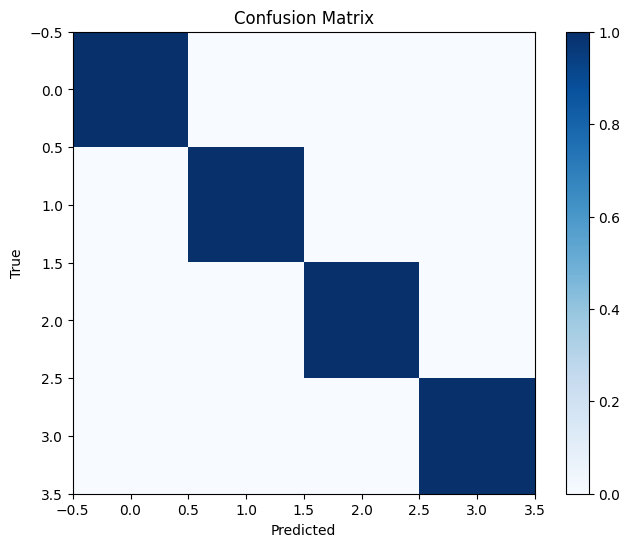

Classification Report:
              precision    recall  f1-score   support

       NoROP       1.00      1.00      1.00         1
      Stage1       1.00      1.00      1.00         1
      Stage2       1.00      1.00      1.00         1
      Stage3       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Assuming you have ground truth labels and predicted labels
ground_truth_labels = ['NoROP', 'Stage1', 'Stage2', 'Stage3']  # Ground truth labels
predicted_labels = ['NoROP', 'Stage1', 'Stage2', 'Stage3']     # Predicted labels

# Generate confusion matrix
cm = confusion_matrix(ground_truth_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate classification report
report = classification_report(ground_truth_labels, predicted_labels)
print("Classification Report:")
print(report)
